Name: Ajinkya Kulkarni

# Project Title: Gender Classified Dataset with Masked Face

# Problem Statement :
In todays world mostly challenging task is classification of images. Every year all big companies tries to classify different images by organizing competitons.
So I also choose project of classification of Male and Female. I am using CNN algorithm to train the data.

In [82]:
# Importing numpy for numeric operations
import numpy as np
# To load data 
import pandas as pd
# To design CNN model architecture 
import keras
import tensorflow
import os

In [2]:
# To design sequential and conv2d different layers of CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [3]:
# loading an image with the Keras API
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

# Loading image and checking shape

In [4]:
#Loading Image
img=load_img("C:/Users/Admin/Ajinkya projects/Capstone Project DL/GenderOcclusionData/Training/male/00016_Mask.jpg")

In [5]:
img.size

(256, 256)

In [6]:
# convert to numpy array
img_array = img_to_array(img)
print(img_array.dtype)# checking datatype of image
print(img_array.shape)# Checking shape of image

float32
(256, 256, 3)


# Checking another image of dataset

In [7]:
# Loading another 1 image to check shape
#Loading Image
img1=load_img("C:/Users/Admin/Ajinkya projects/Capstone Project DL/GenderOcclusionData/Training/male/7.jpg")

In [8]:
# convert to numpy array
img1_array = img_to_array(img1)
print(img1_array.dtype)# checking datatype of image
print(img1_array.shape)# Checking shape of image

float32
(256, 256, 3)


# So as we get to know that maximum images are in shape of 256,256,3

# Creating CNN model

In [9]:
model=Sequential()

In [10]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(256,256,3)))

In [11]:
model.add(MaxPooling2D(pool_size=2))

In [12]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu',))
model.add(MaxPooling2D(pool_size=2))

In [13]:
model.add(Conv2D(filters=16,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))

In [14]:
model.add(Conv2D(filters=8,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Adding a Flatten layer

In [15]:
model.add(Flatten())

# Summary of CNN

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# Create an Artificial Neural Network on top of the CNN

In [17]:
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [18]:
#units=There are 2 classes so units equal to 1 and activation function is 'sigmoid'
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))

In [19]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# Using Image data generator to generate data

In [21]:
from keras.preprocessing.image import ImageDataGenerator #precprocessing, augmentation etc

In [22]:
train_datagen = ImageDataGenerator(
        rescale=1./255, #each and every pixel value will be multiplied with 1.0/255.0
        shear_range=0.2, #Bigger the number higher is the shearing in synthetic images
        zoom_range=0.2, #range will be from 0 to 0.2
        horizontal_flip=True) #Just object instantiation

In [23]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
#flow_from_directory will load the images, augment them batch by batch from the disk to the RAM
train_set = train_datagen.flow_from_directory (
    "C:/Users/Admin/Ajinkya projects/Capstone Project DL/GenderOcclusionData/Training",
    target_size=(256,256), #Each and every image will be reshaped to 64x64 prior to being fed to the CNN
    batch_size=32,
    class_mode='binary')

Found 72318 images belonging to 2 classes.


# Here we segregate data into 2 categories to make test data as validation data

In [25]:
test_set = test_datagen.flow_from_directory(
        "C:/Users/Admin/Ajinkya projects/Capstone Project DL/GenderOcclusionData/Validation",target_size=(256,256),
        batch_size=32,
        class_mode='binary')

Found 16813 images belonging to 2 classes.


In [26]:
len(train_set), 72318/32

(2260, 2259.9375)

In [27]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


# Fitting the model

In [28]:
#train_set is a data generator and it can supply infinite batches of images, all of them randomly augmented
model.fit(train_set, #Exclusively we do not need to specify 'y' here
        steps_per_epoch= len(train_set), #No of batches the CNN goes through before we call it a logical epoch
        epochs=5,
        validation_data=test_set,
        validation_steps=len(test_set))

Epoch 1/5
2260/2260 [==============================] - 5528s 2s/step - loss: 0.4050 - accuracy: 0.8046 - val_loss: 0.2553 - val_accuracy: 0.8905
Epoch 2/5
2260/2260 [==============================] - 5065s 2s/step - loss: 0.2767 - accuracy: 0.8803 - val_loss: 0.2237 - val_accuracy: 0.9041
Epoch 3/5
2260/2260 [==============================] - 6226s 3s/step - loss: 0.2514 - accuracy: 0.8931 - val_loss: 0.1997 - val_accuracy: 0.9142
Epoch 4/5
2260/2260 [==============================] - 5390s 2s/step - loss: 0.2348 - accuracy: 0.9011 - val_loss: 0.1989 - val_accuracy: 0.9193
Epoch 5/5
2260/2260 [==============================] - 3978s 2s/step - loss: 0.2247 - accuracy: 0.9065 - val_loss: 0.1973 - val_accuracy: 0.9192


# Checking accuracy on test data

In [29]:
results=model.evaluate(test_set)

526/526 [==============================] - 316s 600ms/step - loss: 0.1973 - accuracy: 0.9192


# Saving model to check future or unseen data

In [30]:
model.save('C:/Users/Admin/Ajinkya projects/Capstone Project DL')

INFO:tensorflow:Assets written to: C:/Users/Admin/Ajinkya projects/Capstone Project DL\assets


In [84]:
model.save('C:/Users/Admin/Ajinkya projects/Capstone Project DL/model1.h5',save_format='h5')

# Checking model accuracy by using .predict function on test data

In [44]:
new_image=load_img("C:/Users/Admin/Ajinkya projects/Capstone Project DL/GenderOcclusionData/Validation/female/00059_Mask.jpg",target_size=(256,256))

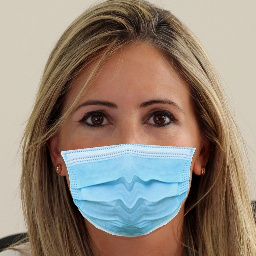

In [45]:
new_image

In [46]:
new_image=np.expand_dims(new_image,axis=0)

In [47]:
new_image.shape

(1, 256, 256, 3)

In [48]:
result=model.predict(new_image)

In [49]:
result

array([[0.]], dtype=float32)

In [39]:
img1=load_img("C:/Users/Admin/Ajinkya projects/Capstone Project DL/GenderOcclusionData/Validation/male/00019_Mask.jpg",target_size=(256,256))

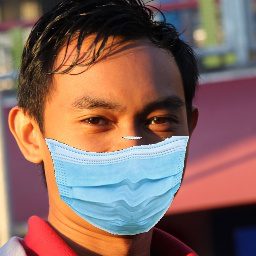

In [40]:
img1

In [41]:
img1=np.expand_dims(img1,axis=0)

In [42]:
img1.shape

(1, 256, 256, 3)

In [43]:
result1=model.predict(img1)
result1

array([[1.]], dtype=float32)

# Checking model accuracy by using .predict function on random data taken from internet

In [50]:
img2=load_img("C:/Users/Admin/Ajinkya projects/Capstone Project DL/images.jpg",target_size=(256,256))

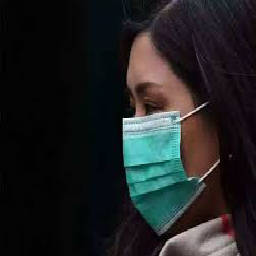

In [51]:
img2

In [52]:
img2=np.expand_dims(img2,axis=0)

In [53]:
img2.shape

(1, 256, 256, 3)

In [68]:
result2=model.predict(img2)
result2

array([[0.]], dtype=float32)

In [56]:
img3=load_img("C:/Users/Admin/Ajinkya projects/Capstone Project DL/images (1).jpg",target_size=(256,256))

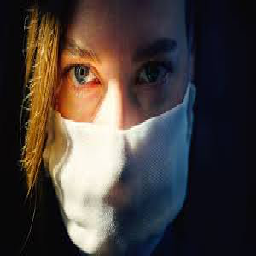

In [57]:
img3

In [58]:
img3=np.expand_dims(img3,axis=0)

In [69]:
result3=model.predict(img3)
result3

array([[0.999998]], dtype=float32)

In [71]:
img4=load_img("C:/Users/Admin/Ajinkya projects/Capstone Project DL/men.jpg",target_size=(256,256))

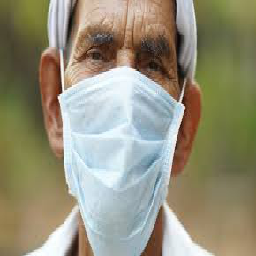

In [72]:
img4

In [73]:
img4=np.expand_dims(img4,axis=0)

In [74]:
result4=model.predict(img4)
result4

array([[2.6819353e-36]], dtype=float32)

In [75]:
img5=load_img("C:/Users/Admin/Ajinkya projects/Capstone Project DL/man.jpg",target_size=(256,256))

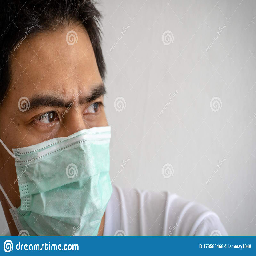

In [76]:
img5

In [78]:
img5=np.expand_dims(img5,axis=0)

In [79]:
result5=model.predict(img5)
result5

array([[1.]], dtype=float32)